In [108]:
import os
os.chdir(r"C:\Users\User\ProyekDATA")
print(os.getcwd())


C:\Users\User\ProyekDATA


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    r"C:\Users\User\ProyekDATA\Dataset_pro.csv",
    sep=";"
)
df.head()

,Timestamp,Nama anda,Berapa Usia Anda?,Domisili anda saat ini?,Jenis Kelamin,Status/pekerjaan utama Anda saat ini?,Apakah anda pernah menggunakan e-wallet sebelumnya?,E-wallet apa saja yang Anda gunakan?,Sudah berapa lama Anda menggunakan e-wallet?,Berapa kali Anda menggunakan e-wallet dalam satu minggu?,...,Saya jarang mengalami kesulitan teknis ketika menggunakan e-wallet,Saya merasa penggunaan e-wallet sesuai dengan kebutuhan transaksi saya,Saya terbuka untuk mencoba fitur baru yang ditawarkan e-wallet,Saya memiliki keinginan untuk terus menggunakan e-wallet di masa mendatang,Saya percaya bahwa transaksi menggunakan e-wallet aman,Saya yakin data pribadi saya terlindungi saat menggunakan e-wallet,Saya percaya penyedia layanan e-wallet dapat menjaga keamanan saldo pengguna,Saya merasa e-wallet memiliki sistem keamanan yang dapat diandalkan,Saya lebih sering menggunakan e-wallet dibandingkan uang tunai dalam berbagai transaksi,"Saya menggunakan e-wallet untuk berbagai jenis transaksi (belanja, transportasi, makanan, pulsa, dll.)"
0,25/11/2025 21:40,Restu Glorya Simangunsong,20,Laguboti,Perempuan,Mahasiswa,Ya,DANA,<1 Tahun,1-3 kali,...,Sangat setuju,Sangat setuju,Netral,Setuju,Netral,Setuju,Sangat setuju,Sangat setuju,Netral,Tidak setuju
1,25/11/2025 22:26,Samuel Alex,21,Laguboti,Laki - laki,Mahasiswa,Ya,"DANA, OVO, GoPay, ShopeePay",2-3 Tahun,1-3 kali,...,Sangat setuju,Tidak setuju,Sangat tidak setuju,Netral,Sangat tidak setuju,Tidak setuju,Netral,Netral,Sangat setuju,Netral
2,27/11/2025 07:49,Yosia Yehezkiel Gurning,20,Laguboti,Laki - laki,Mahasiswa,Ya,"DANA, OVO, ShopeePay",2-3 Tahun,7-9 kali,...,Setuju,Setuju,Sangat tidak setuju,Setuju,Sangat tidak setuju,Setuju,Sangat setuju,Sangat setuju,Netral,Sangat tidak setuju
3,27/11/2025 07:53,Grace Yosephine,19,Laguboti,Perempuan,Mahasiswa,Ya,"DANA, OVO",2-3 Tahun,1-3 kali,...,Sangat setuju,Sangat setuju,Setuju,Sangat setuju,Netral,Setuju,Netral,Sangat setuju,Sangat setuju,Setuju
4,27/11/2025 07:57,,20,Laguboti,Laki - laki,Mahasiswa,Ya,DANA,<1 Tahun,1-3 kali,...,Sangat setuju,Netral,Sangat tidak setuju,Tidak setuju,Setuju,Tidak setuju,Netral,Sangat setuju,Netral,Sangat setuju


In [110]:
print(df.columns.tolist())

df.columns = df.columns.str.strip()

print("Jumlah kolom:", df.shape[1])


['Timestamp', 'Nama anda', 'Berapa Usia Anda?', 'Domisili anda saat ini?', 'Jenis Kelamin', 'Status/pekerjaan utama Anda saat ini?', 'Apakah anda pernah menggunakan e-wallet sebelumnya?', 'E-wallet apa saja yang Anda gunakan? ', 'Sudah berapa lama Anda menggunakan e-wallet?', 'Berapa kali Anda menggunakan e-wallet dalam satu minggu?', 'Saya merasa penggunaan e-wallet lebih praktis dibandingkan pembayaran tunai', 'Saya merasa nyaman melakukan transaksi menggunakan e-wallet', 'Saya memilih e-wallet untuk mengurangi risiko membawa uang tunai.', 'Saya merasa aplikasi e-wallet mudah dipahami meskipun saya baru pertama kali menggunakannya', 'Tampilan dan menu pada e-wallet mudah untuk dioperasikan', 'Saya jarang mengalami kesulitan teknis ketika menggunakan e-wallet', 'Saya merasa penggunaan e-wallet sesuai dengan kebutuhan transaksi saya', 'Saya terbuka untuk mencoba fitur baru yang ditawarkan e-wallet', 'Saya memiliki keinginan untuk terus menggunakan e-wallet di masa mendatang', 'Saya per

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 25 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   Timestamp                                                                                               2030 non-null   object
 1   Nama anda                                                                                               2030 non-null   object
 2   Berapa Usia Anda?                                                                                       2030 non-null   object
 3   Domisili anda saat ini?                                                                                 2030 non-null   object
 4   Jenis Kelamin                                                                                   

In [112]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2025    False
2026    False
2027    False
2028    False
2029    False
Length: 2030, dtype: bool

In [113]:
df.columns = df.columns.str.strip()


==Nama==

In [114]:
df['Nama anda'] = df['Nama anda'].fillna('Responden')

In [115]:
df.rename(columns={'Nama anda': 'Nama'}, inplace=True)

In [116]:
df['Nama'] = df['Nama'].astype(str).str.strip()
df.loc[df['Nama'] == '', 'Nama'] = 'Anonim'

==Usia==

In [117]:
import pandas as pd
import numpy as np
import re

age_raw = df['Berapa Usia Anda?']

kelompok = []

for val in age_raw:
    if pd.isna(val):
        kelompok.append(np.nan)
        continue

    s = str(val).strip()

    if s in ['< 17 tahun', '<17 tahun', '< 17 Tahun']:
        kelompok.append('< 17 tahun')
        continue
    if s in ['17-25 tahun', '17 – 25 tahun']:
        kelompok.append('17-25 tahun')
        continue
    if s in ['26-34 tahun', '26 – 34 tahun']:
        kelompok.append('26-34 tahun')
        continue
    if s in ['> 34 tahun', '> 35 tahun', '>34 tahun']:
        kelompok.append('> 34 tahun')
        continue

    m = re.match(r'(\d+)\s*[Tt]ahun', s)
    if m:
        u = int(m.group(1))
    elif s.isdigit():
        u = int(s)
    else:
        kelompok.append(np.nan)
        continue

    if u < 17:
        kelompok.append('< 17 tahun')
    elif 17 <= u <= 25:
        kelompok.append('17-25 tahun')
    elif 26 <= u <= 34:
        kelompok.append('26-34 tahun')
    else:  # u >= 35
        kelompok.append('> 34 tahun')

df['Kelompok_Usia'] = kelompok
df['Kelompok_Usia'].value_counts()


Kelompok_Usia
17-25 tahun    961
26-34 tahun    432
> 34 tahun     314
< 17 tahun     310
Name: count, dtype: int64

In [118]:
df = df.dropna(subset=['Kelompok_Usia'])

In [119]:
print("Kelompok_Usia kosong:", df['Kelompok_Usia'].isna().sum())
print("\nValue counts for Kelompok_Usia after cleaning:")
df['Kelompok_Usia'].value_counts()

Kelompok_Usia kosong: 0

Value counts for Kelompok_Usia after cleaning:


Kelompok_Usia
17-25 tahun    961
26-34 tahun    432
> 34 tahun     314
< 17 tahun     310
Name: count, dtype: int64

In [120]:
df['Berapa Usia Anda?'].head(20)

0           20
1           21
2           20
3           19
4           20
5           20
6           21
7           32
8           17
9           20
10    21 Tahun
11          20
12          20
13          20
14          20
15    18 Tahun
16          19
17          18
18          20
19          19
Name: Berapa Usia Anda?, dtype: object

In [121]:
df[['Berapa Usia Anda?', 'Kelompok_Usia']].head(70)

,Berapa Usia Anda?,Kelompok_Usia
0,20,17-25 tahun
1,21,17-25 tahun
2,20,17-25 tahun
3,19,17-25 tahun
4,20,17-25 tahun
...,...,...
67,27,26-34 tahun
68,19,17-25 tahun
69,19,17-25 tahun
70,20,17-25 tahun


In [122]:
df['Berapa Usia Anda?'].unique()

array(['20', '21', '19', '32', '17', '21 Tahun', '18 Tahun', '18',
       '19 tahun', '41', '40 tahun', '23', '25', '49', '24', '27', '31',
       '44', '60', '35', '56', '38', '21 tahun', '40', '22', '54',
       '19 tahun ', '19 Tahun ', '20 tahun ', '20 Tahun ', '46', '28',
       '20 tahun', '19 Tahun', '16 tahun', '16', '16 tahun ', '15',
       '16 Tahun', '53', '15 tahun', '15 Tahun', '16tahun', '16 Tahun ',
       '17 tahun', '17 tahun ', '15 tahun ', '18 tahun', '88', '20 Tahun',
       '23 tahun', '17-25 tahun', '> 35 tahun', '26-34 tahun',
       '< 17 tahun', '> 34 tahun'], dtype=object)

In [123]:
df.drop(columns=['Berapa Usia Anda?'], inplace=True)

In [124]:
df['Kelompok_Usia'].value_counts()

Kelompok_Usia
17-25 tahun    961
26-34 tahun    432
> 34 tahun     314
< 17 tahun     310
Name: count, dtype: int64

In [125]:
df.rename(columns={'Kelompok_Usia': 'Usia'}, inplace=True)

In [126]:
cols = list(df.columns)
cols.remove('Usia')
idx = cols.index('Nama')
cols.insert(idx + 1, 'Usia')
df = df[cols]

In [127]:
cols = list(df.columns)
cols.remove('Jenis Kelamin')
idx = cols.index('Nama')
cols.insert(idx + 2, 'Jenis Kelamin')
df = df[cols]

In [128]:
df.head()
df.columns

Index(['Timestamp', 'Nama', 'Usia', 'Jenis Kelamin', 'Domisili anda saat ini?',
       'Status/pekerjaan utama Anda saat ini?',
       'Apakah anda pernah menggunakan e-wallet sebelumnya?',
       'E-wallet apa saja yang Anda gunakan?',
       'Sudah berapa lama Anda menggunakan e-wallet?',
       'Berapa kali Anda menggunakan e-wallet dalam satu minggu?',
       'Saya merasa penggunaan e-wallet lebih praktis dibandingkan pembayaran tunai',
       'Saya merasa nyaman melakukan transaksi menggunakan e-wallet',
       'Saya memilih e-wallet untuk mengurangi risiko membawa uang tunai.',
       'Saya merasa aplikasi e-wallet mudah dipahami meskipun saya baru pertama kali menggunakannya',
       'Tampilan dan menu pada e-wallet mudah untuk dioperasikan',
       'Saya jarang mengalami kesulitan teknis ketika menggunakan e-wallet',
       'Saya merasa penggunaan e-wallet sesuai dengan kebutuhan transaksi saya',
       'Saya terbuka untuk mencoba fitur baru yang ditawarkan e-wallet',
       'S

==Domisili==

In [129]:
kolom_domisili = 'Domisili anda saat ini?'

In [130]:
import numpy as np
import pandas as pd

kolom_domisili = 'Domisili anda saat ini?'

df[kolom_domisili] = df[kolom_domisili].astype(str).str.strip()

df[kolom_domisili] = df[kolom_domisili].replace({'nan': np.nan, 'NaN': np.nan, '': np.nan})

mask_bukan_domisili = df[kolom_domisili].str.fullmatch(r'\d+', na=False) | df[kolom_domisili].str.contains('tahun', case=False, na=False)
df.loc[mask_bukan_domisili, kolom_domisili] = np.nan


In [131]:
df[kolom_domisili].isna().sum()
df[kolom_domisili].value_counts()

Domisili anda saat ini?
Laguboti                 629
Balige                   449
Porsea                   317
Ajibata                  292
Habinsaran                40
Parsoburan                38
Tampahan                  33
Lumban Julu               31
Bonatua Lunasi            27
Sigumpar                  26
Silaen                    14
Nassau                    13
Narumonda                 13
Uluan                     12
Tambunan                  12
Siantar Narumonda          8
Pintu Pohan Meranti        8
Borbor                     7
parsoburan                 5
HABINSARAN                 5
Samosir                    5
Parmaksian                 3
PARSOBURAN                 3
Lumban julu                2
habinsaran                 2
Tornagodang                1
Lumban balik               1
Siborongborong             1
siantar                    1
Sibisa                     1
Siborong-borong            1
sibolga                    1
Rotterdam                  1
Pangaribuan        

In [132]:
valid_domisili = [
    'Balige', 'Laguboti', 'Porsea', 'Ajibata',
    'Bonatua Lunasi', 'Borbor', 'Habinsaran', 'Lumban Julu',
    'Nassau', 'Parmaksian', 'Pintu Pohan Meranti',
    'Siantar Narumonda', 'Sigumpar', 'Silaen',
    'Tampahan', 'Uluan'
]
kolom_domisili = 'Domisili anda saat ini?'

domisili_tidak_valid = (
    df.loc[~df[kolom_domisili].isin(valid_domisili), kolom_domisili]
      .dropna()
      .value_counts()
)

domisili_tidak_valid


Domisili anda saat ini?
Parsoburan               38
Narumonda                13
Tambunan                 12
HABINSARAN                5
parsoburan                5
Samosir                   5
PARSOBURAN                3
Lumban julu               2
habinsaran                2
Pangaribuan               1
Lumban pinasa             1
Tarutung                  1
Siborong-borong           1
Rotterdam                 1
sibolga                   1
sigumpar                  1
Sibisa                    1
siantar                   1
Lumban balik              1
Ambarita                  1
Jakarta                   1
Parsoburan tengah         1
Lumban Djulu              1
Parsoburann               1
parsoburan tengah         1
Habinsarab                1
Lumban Rau Barat          1
Paridian                  1
Tornagodang               1
HABINSARAN/PARSOBURAN     1
Parsburan                 1
Siborongborong            1
Name: count, dtype: int64

In [133]:
mapping_domisili = {
    'narumonda': 'Siantar Narumonda',
    'habinsaran': 'Habinsaran',
    'habinsarab': 'Habinsaran',
    'lumban julu': 'Lumban Julu',
    'sigumpar': 'Sigumpar',

    'parsoburan': 'Habinsaran',
    'parsburan': 'Habinsaran',
    'parsoburann': 'Habinsaran',
    'parsoburan tengah': 'Habinsaran',
    'parsburuan': 'Habinsaran',
    'ambirita': 'Silaen',
    'tornagodang': 'Habinsaran',
    'lumban pinasa': 'Habinsaran',
    'lumban balik': 'Habinsaran',
    'lumban rau barat': 'Laguboti',

    'tambunan': 'Balige',

    'habinsaran/parsoburan': 'Habinsaran'
}

kolom = 'Domisili anda saat ini?'

df[kolom] = (
    df[kolom]
    .astype(str)
    .str.strip()
    .str.lower()
    .map(lambda x: mapping_domisili.get(x, x.title()))
)


In [134]:
valid_domisili = [
    'Balige', 'Laguboti', 'Porsea', 'Ajibata',
    'Bonatua Lunasi', 'Borbor', 'Habinsaran', 'Lumban Julu',
    'Nassau', 'Parmaksian', 'Pintu Pohan Meranti',
    'Siantar Narumonda', 'Sigumpar', 'Silaen',
    'Tampahan', 'Uluan'
]

kolom_domisili = 'Domisili anda saat ini?'

domisili_tidak_valid = (
    df.loc[
        ~df[kolom_domisili].isin(valid_domisili),
        kolom_domisili
    ]
    .dropna()
    .value_counts()
)

domisili_tidak_valid


Domisili anda saat ini?
Samosir            5
Ambarita           1
Paridian           1
Lumban Djulu       1
Jakarta            1
Tarutung           1
Pangaribuan        1
Rotterdam          1
Sibolga            1
Siborong-Borong    1
Sibisa             1
Siantar            1
Siborongborong     1
Name: count, dtype: int64

In [135]:
df['domisili_valid'] = df[kolom_domisili].isin(valid_domisili)
df = df[df['domisili_valid']].drop(columns='domisili_valid')


Responden dengan domisili di luar kecamatan dalam Kabupaten Toba dikeluarkan dari dataset karena tidak termasuk dalam cakupan populasi penelitian. Data tersebut diperlakukan sebagai out-of-scope data (conceptual outlier) untuk menjaga validitas wilayah penelitian.

In [136]:
df.rename(columns={'Domisili anda saat ini?': 'Domisili'}, inplace=True)

In [137]:
df['Domisili'].value_counts()

Domisili
Laguboti               630
Balige                 461
Porsea                 317
Ajibata                292
Habinsaran             102
Lumban Julu             33
Tampahan                33
Sigumpar                27
Bonatua Lunasi          27
Siantar Narumonda       21
Silaen                  14
Nassau                  13
Uluan                   12
Pintu Pohan Meranti      8
Borbor                   7
Parmaksian               3
Name: count, dtype: int64

In [138]:
valid_domisili = [
    'Balige', 'Laguboti', 'Porsea', 'Ajibata',
    'Bonatua Lunasi', 'Borbor', 'Habinsaran', 'Lumban Julu',
    'Nassau', 'Parmaksian', 'Pintu Pohan Meranti',
    'Siantar Narumonda', 'Sigumpar', 'Silaen',
    'Tampahan', 'Uluan', 'Parsoburan'
]
kolom_domisili = 'Domisili'

domisili_tidak_valid = (
    df.loc[~df[kolom_domisili].isin(valid_domisili), kolom_domisili]
      .dropna()
      .value_counts()
)

domisili_tidak_valid

Series([], Name: count, dtype: int64)

Hasil domisili yang tidak valid sudah di drop dan tidak ada lagi

==Status/Pekerjaan==

In [139]:
df = df.rename(columns={'Status/pekerjaan utama Anda saat ini?': 'Status/Pekerjaan'})

In [140]:
df['Status/Pekerjaan'] = df['Status/Pekerjaan'].astype(str).str.strip()

mapping_status = {
  'guru':'Guru',
  'honorer':'Honorer',
  'pendeta':'Pendeta',
  'perawat':'Perawat',
  'petani':'Petani',
  'nelayan':'Nelayan',
  'pns(pegawai negeri sipil)':'PNS',
  'tenga pengajar':'Tenaga Pengajar',
  'penjait':'Penjahit'
}

df['Status/Pekerjaan'] = df['Status/Pekerjaan'].str.lower().replace(mapping_status)
df['Status/Pekerjaan'] = df['Status/Pekerjaan'].str.title()


==Pengalaman penggunaan e-wallet==

In [141]:
df = df.rename(columns={'Apakah anda pernah menggunakan e-wallet sebelumnya?': 'pernah_menggunakan_ewallet'})

==Jenis E-wallet==

In [142]:
df = df.rename(columns={
    'E-wallet apa saja yang Anda gunakan?': 'platform_ewallet'
})

In [143]:
df.columns

Index(['Timestamp', 'Nama', 'Usia', 'Jenis Kelamin', 'Domisili',
       'Status/Pekerjaan', 'pernah_menggunakan_ewallet', 'platform_ewallet',
       'Sudah berapa lama Anda menggunakan e-wallet?',
       'Berapa kali Anda menggunakan e-wallet dalam satu minggu?',
       'Saya merasa penggunaan e-wallet lebih praktis dibandingkan pembayaran tunai',
       'Saya merasa nyaman melakukan transaksi menggunakan e-wallet',
       'Saya memilih e-wallet untuk mengurangi risiko membawa uang tunai.',
       'Saya merasa aplikasi e-wallet mudah dipahami meskipun saya baru pertama kali menggunakannya',
       'Tampilan dan menu pada e-wallet mudah untuk dioperasikan',
       'Saya jarang mengalami kesulitan teknis ketika menggunakan e-wallet',
       'Saya merasa penggunaan e-wallet sesuai dengan kebutuhan transaksi saya',
       'Saya terbuka untuk mencoba fitur baru yang ditawarkan e-wallet',
       'Saya memiliki keinginan untuk terus menggunakan e-wallet di masa mendatang',
       'Saya percay

In [144]:
platforms = ["DANA", "OVO", "GoPay", "ShopeePay"]

for p in platforms:
    df[f"platform_{p}"] = (
        df["platform_ewallet"]
        .str.contains(p, case=False, na=False)
        .astype(int)
    )


==Durasi Penggunaan==

In [145]:
df = df.rename(columns={'Durasi Penggunaan': 'durasi_penggunaan'})

In [146]:
import numpy as np
import pandas as pd

def normalize_durasi(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    if '<' in x or 'kurang' in x:
        return '<1 Tahun'
    elif '1-2' in x or ('1' in x and 'tahun' in x):
        return '1-2 Tahun'
    elif '2-3' in x or ('2' in x and 'tahun' in x):
        return '2-3 Tahun'
    elif '3-4' in x or ('3' in x and 'tahun' in x):
        return '3-4 Tahun'
    elif '>' in x or 'lebih' in x or '4+' in x:
        return '>4 Tahun'
    else:
        return np.nan
df['Sudah berapa lama Anda menggunakan e-wallet?'] = (
    df['Sudah berapa lama Anda menggunakan e-wallet?']
    .apply(normalize_durasi)
)

df.rename(
    columns={'Sudah berapa lama Anda menggunakan e-wallet?': 'durasi_penggunaan'},
    inplace=True
)


In [147]:
df['Status/Pekerjaan'] = df['Status/Pekerjaan'].astype(str).str.strip()

mapping_status = {
  'guru':'Guru',
  'honorer':'Honorer',
  'pendeta':'Pendeta',
  'perawat':'Perawat',
  'petani':'Petani',
  'nelayan':'Nelayan',
  'pns(pegawai negeri sipil)':'PNS',
  'tenga pengajar':'Tenaga Pengajar',
  'penjait':'Penjahit'
}

df['Status/Pekerjaan'] = df['Status/Pekerjaan'].str.lower().replace(mapping_status)
df['Status/Pekerjaan'] = df['Status/Pekerjaan'].str.title()


==Durasi Penggunaan Mingguan==

In [148]:
df = df.rename(columns={
    'Berapa kali Anda menggunakan e-wallet dalam satu minggu?': 'frekuensi_penggunaan_mingguan'
})


In [149]:
df = df.rename(columns={
    'Berapa kali Anda menggunakan e-wallet dalam satu minggu?': 'frekuensi_penggunaan_mingguan'
})


In [150]:
df.drop(columns=["platform_ewallet"], inplace=True)


==Kemudahan dibanding tunai==

In [151]:
df = df.rename(columns={
    'Saya merasa penggunaan e-wallet lebih praktis dibandingkan pembayaran tunai': 'praktis_dibanding_tunai'
})


In [152]:
df['praktis_dibanding_tunai'] = df['praktis_dibanding_tunai'].replace({'Sangat Setuju':'Sangat setuju'})

==kenyamanan==

In [153]:
df = df.rename(columns={
    'Saya merasa nyaman melakukan transaksi menggunakan e-wallet': 'kenyamanan_transaksi'
})


==mengurangi risiko membawa uang tunai==

In [154]:
df = df.rename(columns={
    'Saya memilih e-wallet untuk mengurangi risiko membawa uang tunai.': 'pengurangan_risiko_tunai'
})


==pemahaman penggunaan==

In [155]:
df = df.rename(columns={
    'Saya merasa aplikasi e-wallet mudah dipahami meskipun saya baru pertama kali menggunakannya': 'persepsi_kemudahan_pemahaman'
})


==UI mudah dioperasikan==

In [156]:
df = df.rename(columns={
    'Tampilan dan menu pada e-wallet mudah untuk dioperasikan': 'persepsi_kemudahan_operasi'
})


==jarangnya mengalami kesulitan==

In [157]:
df = df.rename(columns={
    'Saya jarang mengalami kesulitan teknis ketika menggunakan e-wallet': 'persepsi_kemudahan_teknis'
})


==Sesuai kebutuhan==

In [158]:

df = df.rename(columns={
    'Saya merasa penggunaan e-wallet sesuai dengan kebutuhan transaksi saya': 'persepsi_kesesuaian_kebutuhan'
})


==Keterbukaan mencoba fitur baru==

In [159]:
df = df.rename(columns={
    'Saya terbuka untuk mencoba fitur baru yang ditawarkan e-wallet': 'persepsi_keterbukaan_inovasi'
})


==Tetap menggunakan E-wallet==

In [160]:
df = df.rename(columns={
    'Saya memiliki keinginan untuk terus menggunakan e-wallet di masa mendatang': 'niat_penggunaan_berkelanjutan'
})


==Keamanan transaksi==

In [161]:
df = df.rename(columns={
    'Saya percaya bahwa transaksi menggunakan e-wallet aman': 'persepsi_keamanan_transaksi'
})


==Keamanan data diri==

In [162]:
df = df.rename(columns={
    'Saya yakin data pribadi saya terlindungi saat menggunakan e-wallet': 'keamanan_data_pribadi'
})


==Keamanan saldo==

In [163]:
df = df.rename(columns={
    'Saya percaya penyedia layanan e-wallet dapat menjaga keamanan saldo pengguna': 'persepsi_keamanan_saldo'
})


==Keamanan dapat diandalkan==

In [164]:
df = df.rename(columns={
    'Saya merasa e-wallet memiliki sistem keamanan yang dapat diandalkan': 'persepsi_keandalan_sistem_keamanan'
})


==Seringnya penggunaan E-wallet==

In [165]:
df = df.rename(columns={
    'Saya lebih sering menggunakan e-wallet dibandingkan uang tunai dalam berbagai transaksi': 'kecenderungan_penggunaan_ewallet'
})


==Jenis transaksi berbeda==

In [166]:
df = df.rename(columns={
    'Saya menggunakan e-wallet untuk berbagai jenis transaksi (belanja, transportasi, makanan, pulsa, dll.)': 'persepsi_keluasan_penggunaan'
})

In [167]:
kolom_target = [
    'durasi_penggunaan',
    'pengurangan_risiko_tunai',
    'pernah_menggunakan_ewallet',
    'praktis_dibanding_tunai',
    'kenyamanan_transaksi'
]

df[kolom_target].isna().sum()


durasi_penggunaan             15
pengurangan_risiko_tunai      13
pernah_menggunakan_ewallet     0
praktis_dibanding_tunai        9
kenyamanan_transaksi           9
dtype: int64

In [168]:
kolom_target = [
    'durasi_penggunaan',
    'pengurangan_risiko_tunai',
    'pernah_menggunakan_ewallet',
    'praktis_dibanding_tunai',
    'kenyamanan_transaksi'
]

for col in kolom_target:
    mode_val = df[col].mode(dropna=True)
    if len(mode_val) > 0:
        df[col] = df[col].fillna(mode_val.iloc[0])


In [169]:
df[kolom_target].isna().sum()


durasi_penggunaan             0
pengurangan_risiko_tunai      0
pernah_menggunakan_ewallet    0
praktis_dibanding_tunai       0
kenyamanan_transaksi          0
dtype: int64

===Metode EDA===

In [170]:
#EDA
df.info()

# Statistik deskriptif
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2029
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Timestamp                           2000 non-null   object
 1   Nama                                2000 non-null   object
 2   Usia                                2000 non-null   object
 3   Jenis Kelamin                       2000 non-null   object
 4   Domisili                            2000 non-null   object
 5   Status/Pekerjaan                    2000 non-null   object
 6   pernah_menggunakan_ewallet          2000 non-null   object
 7   durasi_penggunaan                   2000 non-null   object
 8   frekuensi_penggunaan_mingguan       2000 non-null   object
 9   praktis_dibanding_tunai             2000 non-null   object
 10  kenyamanan_transaksi                2000 non-null   object
 11  pengurangan_risiko_tunai            2000 non-null   object
 1

,Timestamp,Nama,Usia,Jenis Kelamin,Domisili,Status/Pekerjaan,pernah_menggunakan_ewallet,durasi_penggunaan,frekuensi_penggunaan_mingguan,praktis_dibanding_tunai,...,persepsi_keamanan_transaksi,keamanan_data_pribadi,persepsi_keamanan_saldo,persepsi_keandalan_sistem_keamanan,kecenderungan_penggunaan_ewallet,persepsi_keluasan_penggunaan,platform_DANA,platform_OVO,platform_GoPay,platform_ShopeePay
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,1273,1769,4,2,16,20,1,5,5,5,...,5,5,5,5,5,5,NaN,NaN,NaN,NaN
top,10/12/2025 06:07,Maria Situmorang,17-25 tahun,Perempuan,Laguboti,Mahasiswa,Ya,2-3 Tahun,4-6 kali,Setuju,...,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,NaN,NaN,NaN,NaN
freq,13,5,950,1109,630,540,2000,654,501,791,...,777,753,733,761,704,725,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.604000,0.263500,0.285000,0.293000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.489187,0.440641,0.451527,0.455252
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [171]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_df[missing_df["Missing Count"] > 0]


,Missing Count,Missing Percentage (%)


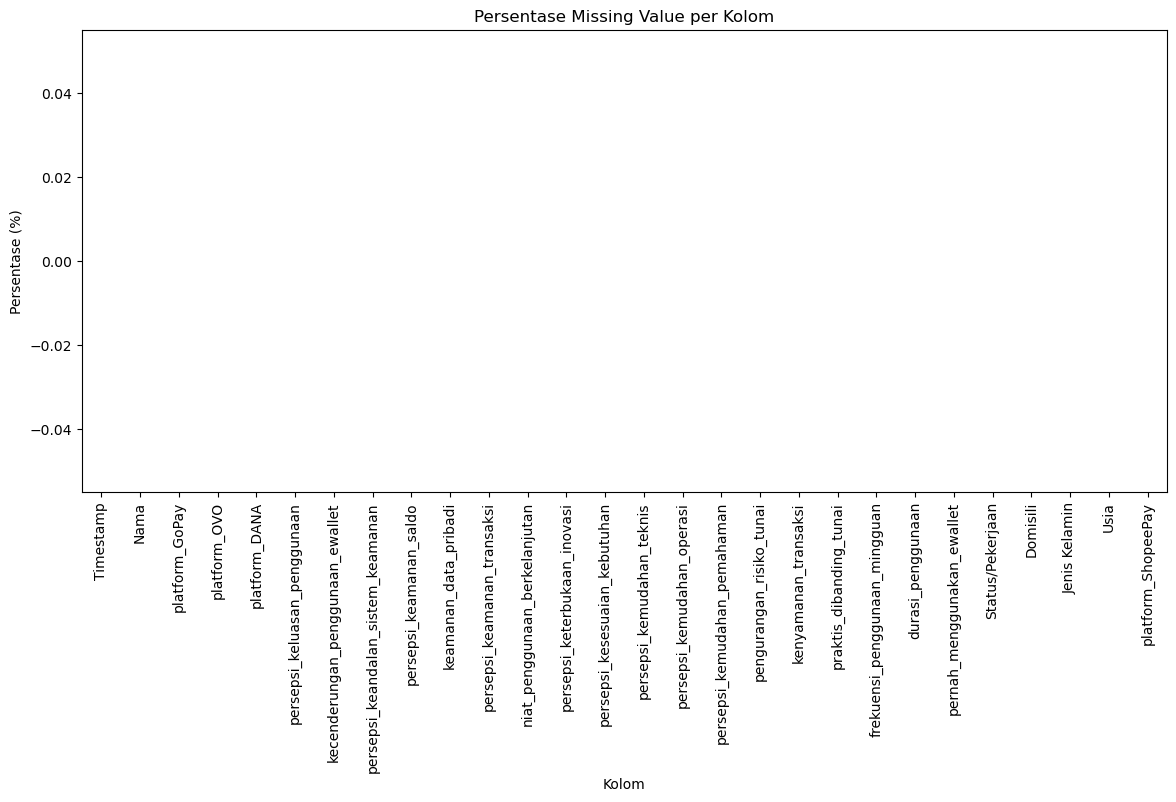

In [172]:
plt.figure(figsize=(14,6))
sns.barplot(
    x=missing_df.index,
    y=missing_df["Missing Percentage (%)"]
)
plt.xticks(rotation=90)
plt.title("Persentase Missing Value per Kolom")
plt.ylabel("Persentase (%)")
plt.xlabel("Kolom")
plt.show()


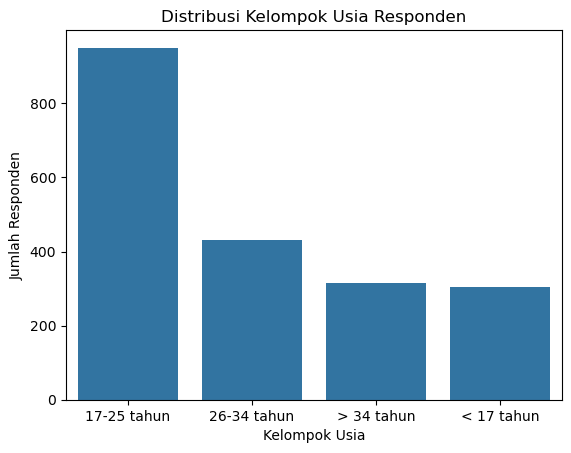

In [173]:
# Distribusi usia
plt.figure()
sns.countplot(data=df, x="Usia")
plt.title("Distribusi Kelompok Usia Responden")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Responden")
plt.show()


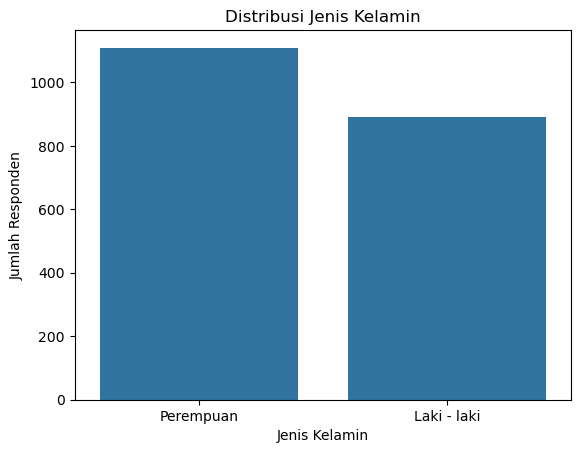

In [174]:
# Distribusi jenis kelamin
plt.figure()
sns.countplot(data=df, x="Jenis Kelamin")
plt.title("Distribusi Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Responden")
plt.show()


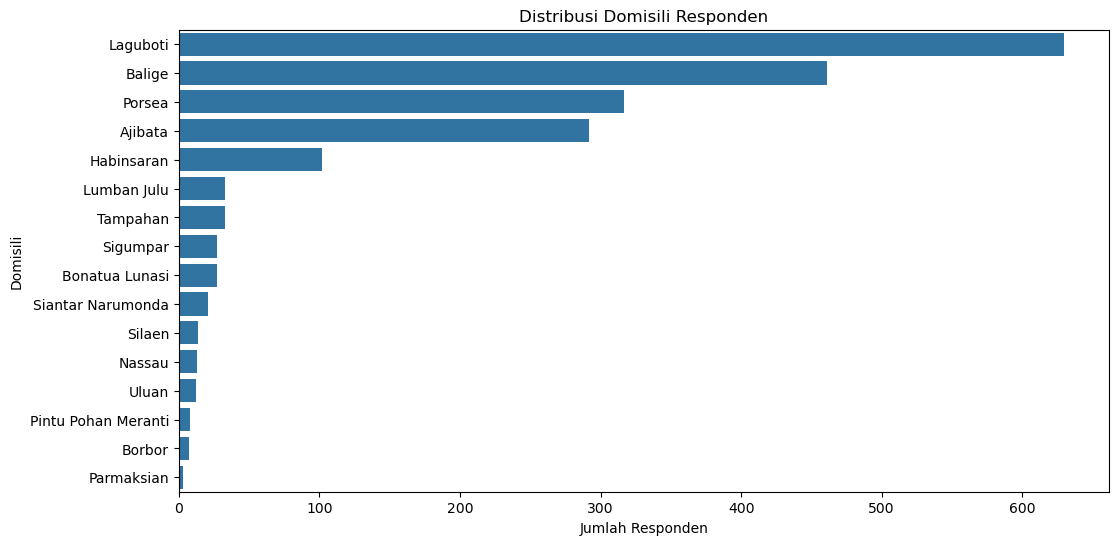

In [175]:
#Domisili Responden
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y="Domisili",
    order=df["Domisili"].value_counts().index
)
plt.title("Distribusi Domisili Responden")
plt.xlabel("Jumlah Responden")
plt.ylabel("Domisili")
plt.show()


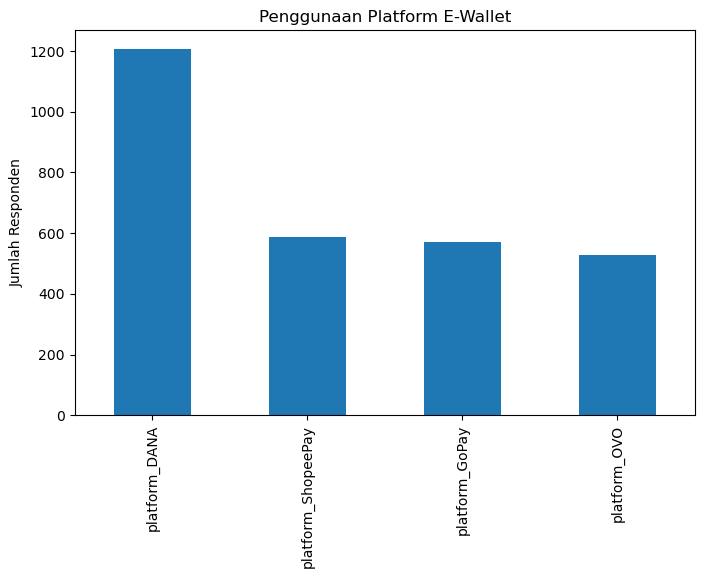

In [176]:
import matplotlib.pyplot as plt

platform_cols = [
    "platform_DANA",
    "platform_OVO",
    "platform_GoPay",
    "platform_ShopeePay"
]

platform_counts = df[platform_cols].sum().sort_values(ascending=False)

platform_counts.plot(
    kind="bar",
    figsize=(8,5),
    title="Penggunaan Platform E-Wallet"
)
plt.ylabel("Jumlah Responden")
plt.show()


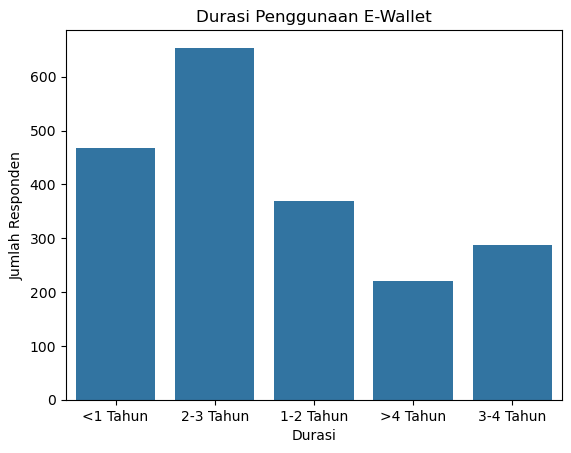

In [177]:
# Durasi Penggunaan
plt.figure()
sns.countplot(data=df, x="durasi_penggunaan")
plt.title("Durasi Penggunaan E-Wallet")
plt.xlabel("Durasi")
plt.ylabel("Jumlah Responden")
plt.show()


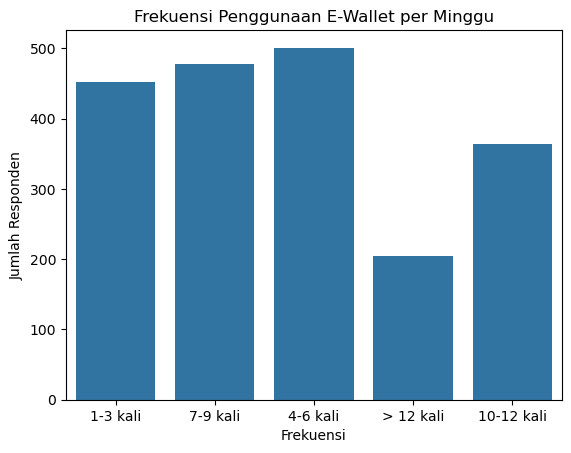

In [178]:
# Frekuensi penggunaan mingguan
plt.figure()
sns.countplot(data=df, x="frekuensi_penggunaan_mingguan")
plt.title("Frekuensi Penggunaan E-Wallet per Minggu")
plt.xlabel("Frekuensi")
plt.ylabel("Jumlah Responden")
plt.show()


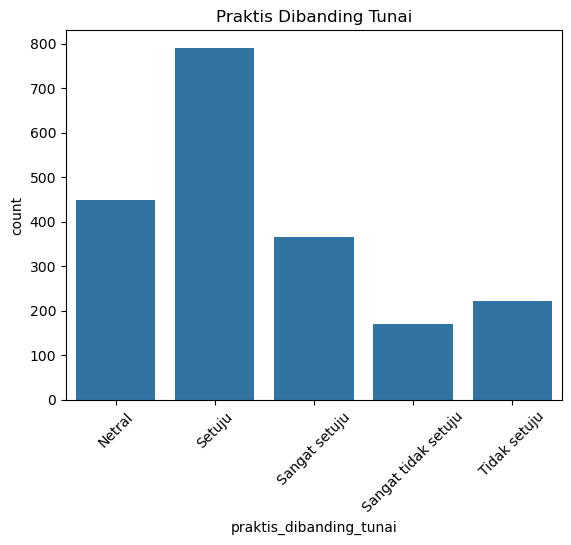

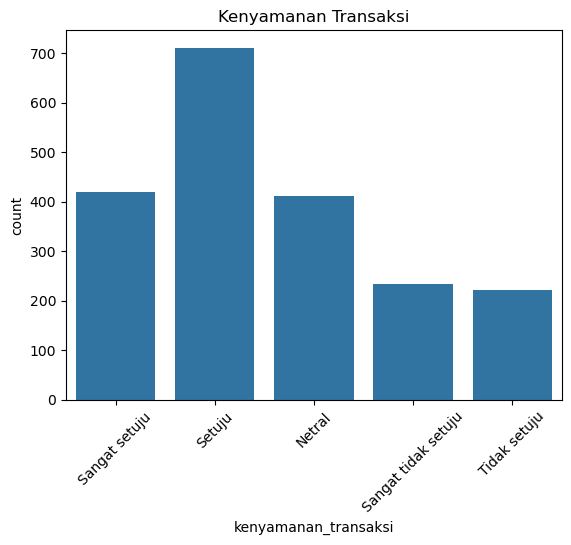

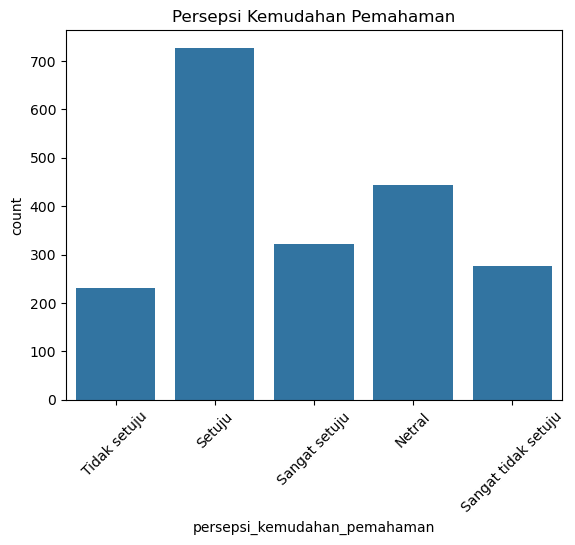

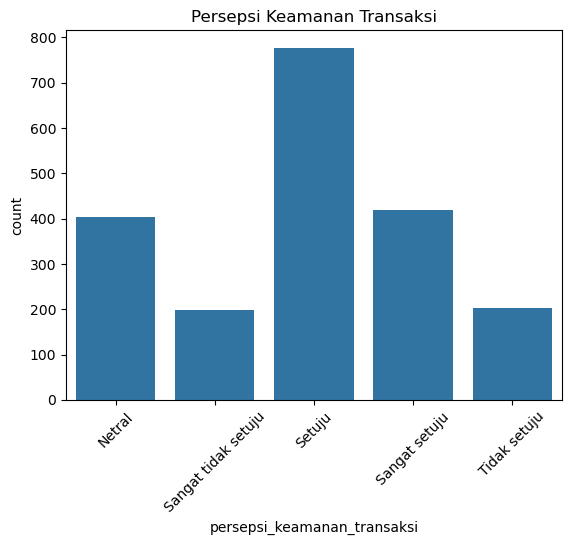

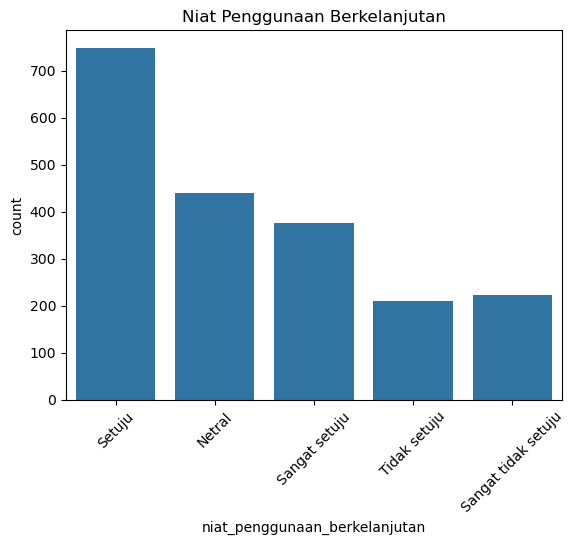

In [179]:
#KEmudahan dan keamanan
likert_cols = [
    "praktis_dibanding_tunai",
    "kenyamanan_transaksi",
    "persepsi_kemudahan_pemahaman",
    "persepsi_keamanan_transaksi",
    "niat_penggunaan_berkelanjutan"
]

for col in likert_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(col.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.show()


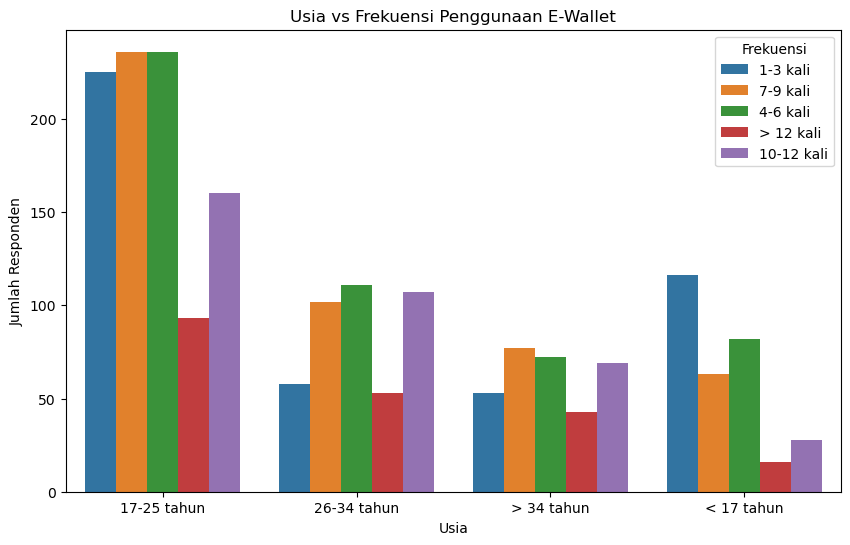

In [180]:
#Usia vs frekuensi penggunaan
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="Usia",
    hue="frekuensi_penggunaan_mingguan"
)
plt.title("Usia vs Frekuensi Penggunaan E-Wallet")
plt.xlabel("Usia")
plt.ylabel("Jumlah Responden")
plt.legend(title="Frekuensi")
plt.show()


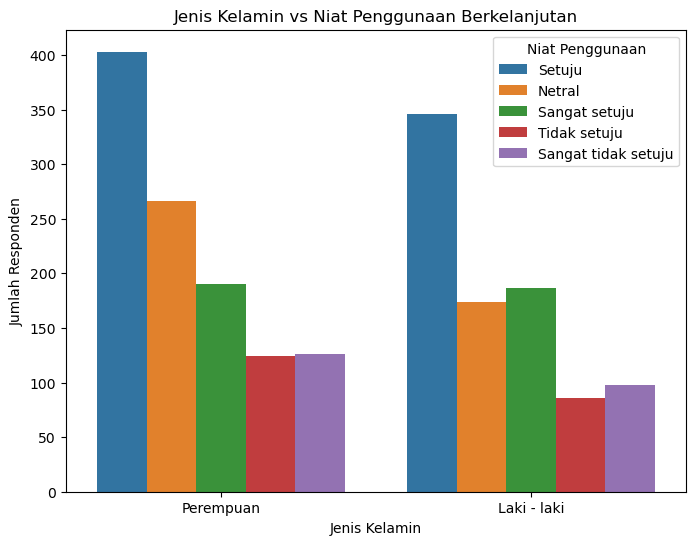

In [181]:
# Jenis Kelamin vs Niat Penggunaan Berkelanjutan
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Jenis Kelamin",
    hue="niat_penggunaan_berkelanjutan"
)
plt.title("Jenis Kelamin vs Niat Penggunaan Berkelanjutan")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Responden")
plt.legend(title="Niat Penggunaan")
plt.show()


In [182]:
# Menentukan target machine learning yaitu kecenderungan_penggunaan_ewallet
target = "kecenderungan_penggunaan_ewallet"

In [183]:
# Menentukan feature
features = [
    "Usia",
    "Jenis Kelamin",
    "Domisili",
    "Status/Pekerjaan",

    #Platform e-wallet
    "platform_DANA",
    "platform_OVO",
    "platform_GoPay",
    "platform_ShopeePay",

    #Adopsi dan intensitas
    "durasi_penggunaan",
    "frekuensi_penggunaan_mingguan",

    #Faktor perilaku
    "praktis_dibanding_tunai",
    "kenyamanan_transaksi",
    "pengurangan_risiko_tunai",
    "persepsi_kemudahan_pemahaman",
    "persepsi_kemudahan_operasi",
    "persepsi_kemudahan_teknis",
    "persepsi_kesesuaian_kebutuhan",
    "persepsi_keterbukaan_inovasi",
    "niat_penggunaan_berkelanjutan",
    "persepsi_keamanan_transaksi",
    "keamanan_data_pribadi",
    "persepsi_keamanan_saldo",
    "persepsi_keandalan_sistem_keamanan",
    "kecenderungan_penggunaan_ewallet",
    "persepsi_keluasan_penggunaan"
]


In [184]:
X = df[features]
y = df[target]


In [185]:
# Encode fitur
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
cat_cols = X_encoded.select_dtypes(include="object").columns

for col in cat_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Encode target
y_encoded = LabelEncoder().fit_transform(y)


In [186]:
# Hasil encode
X_encoded.head()


,Usia,Jenis Kelamin,Domisili,Status/Pekerjaan,platform_DANA,platform_OVO,platform_GoPay,platform_ShopeePay,durasi_penggunaan,frekuensi_penggunaan_mingguan,...,persepsi_kemudahan_teknis,persepsi_kesesuaian_kebutuhan,persepsi_keterbukaan_inovasi,niat_penggunaan_berkelanjutan,persepsi_keamanan_transaksi,keamanan_data_pribadi,persepsi_keamanan_saldo,persepsi_keandalan_sistem_keamanan,kecenderungan_penggunaan_ewallet,persepsi_keluasan_penggunaan
0,0,1,5,9,1,0,0,0,3,0,...,1,1,0,3,0,3,1,1,0,4
1,0,0,5,9,1,1,1,1,1,0,...,1,4,2,0,2,4,0,0,1,0
2,0,0,5,9,1,1,0,1,1,3,...,3,3,2,3,2,3,1,1,0,2
3,0,1,5,9,1,1,0,0,1,0,...,1,1,3,1,0,3,0,1,1,3
4,0,0,5,9,1,0,0,0,3,0,...,1,0,2,4,3,4,0,1,0,1


In [187]:
X = X_encoded.rename(columns={
    "praktis_dibanding_tunai": "Q1",
    "kenyamanan_transaksi": "Q2",
    "pengurangan_risiko_tunai": "Q3",
    "persepsi_kemudahan_pemahaman": "Q4",
    "persepsi_kemudahan_operasi": "Q5",
    "persepsi_kemudahan_teknis": "Q6",
    "persepsi_kesesuaian_kebutuhan": "Q7",
    "persepsi_keterbukaan_inovasi": "Q8",
    "niat_penggunaan_berkelanjutan": "Q9",
    "persepsi_keamanan_transaksi": "Q10",
    "keamanan_data_pribadi": "Q11",
    "persepsi_keamanan_saldo": "Q12",
    "persepsi_keandalan_sistem_keamanan": "Q13",
    "kecenderungan_penggunaan_ewallet": "Q14",
    "persepsi_keluasan_penggunaan": "Q15"
})


In [188]:
X.head()

,Usia,Jenis Kelamin,Domisili,Status/Pekerjaan,platform_DANA,platform_OVO,platform_GoPay,platform_ShopeePay,durasi_penggunaan,frekuensi_penggunaan_mingguan,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,0,1,5,9,1,0,0,0,3,0,...,1,1,0,3,0,3,1,1,0,4
1,0,0,5,9,1,1,1,1,1,0,...,1,4,2,0,2,4,0,0,1,0
2,0,0,5,9,1,1,0,1,1,3,...,3,3,2,3,2,3,1,1,0,2
3,0,1,5,9,1,1,0,0,1,0,...,1,1,3,1,0,3,0,1,1,3
4,0,0,5,9,1,0,0,0,3,0,...,1,0,2,4,3,4,0,1,0,1


In [189]:
X["Perilaku"] = X[["Q1", "Q2", "Q3"]].mean(axis=1)
X["Kemudahan"] = X[["Q4", "Q5", "Q6"]].mean(axis=1)
X["Adopsi"] = X[["Q7", "Q8", "Q9"]].mean(axis=1)
X["Kepercayaan"] = X[["Q10", "Q11", "Q12", "Q13"]].mean(axis=1)
X["Intensitas"] = X[["Q14", "Q15"]].mean(axis=1)

In [190]:
X_features = X[["Perilaku","Adopsi","Kemudahan","Kepercayaan"]] #YANG diganti

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [192]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_features)

In [193]:
kmeans = KMeans(n_clusters=2, random_state=42)
X["Cluster"] = kmeans.fit_predict(scaled_features)


In [194]:
print(X[["Perilaku", "Kemudahan", "Adopsi", "Kepercayaan", "Intensitas", "Cluster"]].head())


   Perilaku  Kemudahan    Adopsi  Kepercayaan  Intensitas  Cluster
0  0.666667   1.666667  1.333333         1.25         2.0        1
1  1.000000   2.666667  2.000000         1.50         0.5        1
2  1.333333   3.000000  2.666667         1.75         1.0        0
3  1.333333   1.666667  1.666667         1.00         2.0        1
4  1.666667   1.666667  2.000000         2.00         0.5        1


In [195]:
#Penentuan jumlah cluster optimal
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)

    print(f"K={k}, Silhouette={score:.3f}")

    if score > best_score:
        best_score = score
        best_k = k

print("BEST K:", best_k, "SCORE:", best_score)

K=2, Silhouette=0.239
K=3, Silhouette=0.199
K=4, Silhouette=0.193
K=5, Silhouette=0.205
K=6, Silhouette=0.207
BEST K: 2 SCORE: 0.2391710921917614


In [196]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_features, X["Cluster"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.2391710921917614


In [197]:
y = X["Intensitas"]
y = (y >= y.median()).astype(int)

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [199]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

==Mengecek Model==

In [200]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.48      0.29      0.36       164
           1       0.61      0.78      0.69       236

    accuracy                           0.58       400
   macro avg       0.55      0.54      0.52       400
weighted avg       0.56      0.58      0.55       400

[[ 47 117]
 [ 51 185]]


In [217]:
coef = model.named_steps["logreg"].coef_[0]

for f, c in zip(X_features.columns, coef): 
    print(f, round(c, 3))


Perilaku 0.188
Adopsi 0.262
Kemudahan 0.103
Kepercayaan 0.274


In [202]:
y = (X["Intensitas"] >= X["Intensitas"].median()).astype(int)
print(y.value_counts())
print("median intensitas:", X["Intensitas"].median())


Intensitas
1    1182
0     818
Name: count, dtype: int64
median intensitas: 2.0


In [203]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_features, y, cv=cv, scoring="roc_auc")

print("CV ROC-AUC per fold:", np.round(scores, 3))
print("Mean ROC-AUC:", scores.mean().round(3))
print("Std ROC-AUC:", scores.std().round(3))


CV ROC-AUC per fold: [0.635 0.63  0.622 0.637 0.629]
Mean ROC-AUC: 0.631
Std ROC-AUC: 0.005


In [204]:
# Prediksi kelas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [205]:
#Simpan Hasil prediksi
import pandas as pd

result_df = X_test.copy()
result_df["y_true"] = y_test.values
result_df["y_pred"] = y_pred
result_df["y_proba"] = y_proba

result_df.to_csv("hasil_prediksi_logreg.csv", index=False)
print("Saved: hasil_prediksi_logreg.csv")


Saved: hasil_prediksi_logreg.csv


In [206]:
#Simpan Koefisien
import numpy as np
import pandas as pd

coef = model.named_steps["logreg"].coef_[0]
odds_ratio = np.exp(coef)

coef_df = pd.DataFrame({
    "feature": X_features.columns,
    "coef": coef,
    "odds_ratio": odds_ratio
}).sort_values("odds_ratio", ascending=False)

coef_df.to_csv("koefisien_logreg.csv", index=False)
print("Saved: koefisien_logreg.csv")


Saved: koefisien_logreg.csv


In [207]:
# Menyimpan model ke folder models/
import os
import joblib

MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(model, os.path.join(MODEL_DIR, "model_logreg.pkl"))
joblib.dump(kmeans, os.path.join(MODEL_DIR, "model_kmeans.pkl"))

print("Model Logistic Regression dan K-Means berhasil disimpan di folder 'models'")


Model Logistic Regression dan K-Means berhasil disimpan di folder 'models'


In [208]:
#Load model
import joblib

logreg_loaded = joblib.load(os.path.join("models", "model_logreg.pkl"))
kmeans_loaded = joblib.load(os.path.join("models", "model_kmeans.pkl"))

In [209]:
import os
print("Working directory:", os.getcwd())


Working directory: C:\Users\User\ProyekDATA


In [210]:
import os
print("Working directory:", os.getcwd())
print("Isi folder:", os.listdir())


Working directory: C:\Users\User\ProyekDATA
Isi folder: ['.ipynb_checkpoints', 'app.py', 'DASI_DALIS_KEL_10_final.ipynb', 'dataset_bersih.csv', 'dataset_final.csv', 'Dataset_pro.csv', 'hasil_prediksi_logreg.csv', 'koefisien_logreg.csv', 'models', 'requirements.txt']


In [211]:
#cek file
import os
os.listdir()


['.ipynb_checkpoints',
 'app.py',
 'DASI_DALIS_KEL_10_final.ipynb',
 'dataset_bersih.csv',
 'dataset_final.csv',
 'Dataset_pro.csv',
 'hasil_prediksi_logreg.csv',
 'koefisien_logreg.csv',
 'models',
 'requirements.txt']

In [212]:
df.to_csv("dataset_final.csv", index=False)
print("dataset_final.csv berhasil disimpan")


dataset_final.csv berhasil disimpan


In [ ]:
import joblib

joblib.dump(model, "model_pipeline.pkl")

joblib.dump(list(model.feature_names_in_), "train_features.pkl")

joblib.dump(X_test.index, "test_index.pkl")

joblib.dump(y_test, "y_test.pkl")
joblib.dump(model.predict(X_test), "y_pred.pkl")


In [221]:
import joblib

feature_cols = ["Perilaku","Kemudahan","Adopsi","Kepercayaan"]
joblib.dump(feature_cols, "feature_cols.pkl")

joblib.dump(model, "model_logreg.pkl")
joblib.dump(X_test.index.tolist(), "test_index.pkl")
joblib.dump(y_test.tolist(), "y_test.pkl")
joblib.dump(model.predict(X_test).tolist(), "y_pred.pkl")
joblib.dump(model.predict_proba(X_test)[:, 1].tolist(), "y_proba.pkl")

print(" export OK")


✅ export OK
